In [23]:
# Multi Layer Perceptron Neural Network

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [25]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\train_data_2.csv")

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])
train_data["plan_configuration"] = encoder.fit_transform(train_data["plan_configuration"])
train_data["legal_ownership_status"] = encoder.fit_transform(train_data["legal_ownership_status"])

In [28]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,30,266,1224,1,25,5,2,2,2,0,...,0,0,0,0,0,0,0,0,0,2
1,17,409,12182,2,0,13,7,2,2,0,...,0,0,0,0,0,0,0,0,0,3
2,17,716,7056,2,5,12,6,1,2,1,...,0,0,0,0,0,0,0,0,0,3
3,4,651,105,2,80,5,4,0,2,0,...,0,0,0,0,0,0,0,0,0,2
4,3,1387,3909,5,40,5,10,2,2,0,...,0,0,0,0,0,0,0,0,0,2


In [30]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,38].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [33]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
6515/6515 [==============================] - 8s 1ms/step - loss: 0.6957 - accuracy: 0.6726 - val_loss: 0.6974 - val_accuracy: 0.6713
Epoch 2/10
6515/6515 [==============================] - 7s 1ms/step - loss: 0.6908 - accuracy: 0.6744 - val_loss: 0.6941 - val_accuracy: 0.6741
Epoch 3/10
6515/6515 [==============================] - 8s 1ms/step - loss: 0.6862 - accuracy: 0.6774 - val_loss: 0.6921 - val_accuracy: 0.6749
Epoch 4/10
6515/6515 [==============================] - 8s 1ms/step - loss: 0.6826 - accuracy: 0.6797 - val_loss: 0.6898 - val_accuracy: 0.6774
Epoch 5/10
6515/6515 [==============================] - 8s 1ms/step - loss: 0.6789 - accuracy: 0.6823 - val_loss: 0.6868 - val_accuracy: 0.6807
Epoch 6/10
6515/6515 [==============================] - 8s 1ms/step - loss: 0.6759 - accuracy: 0.6835 - val_loss: 0.6882 - val_accuracy: 0.6787
Epoch 7/10
6515/6515 [==============================] - 8s 1ms/step - loss: 0.6730 - accuracy: 0.6848 - val_loss: 0.6910 - val_accuracy:

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1629/1629 [==============================] - 1s 762us/step - loss: 0.6886 - accuracy: 0.6784
Test accuracy: 0.6784021854400635


In [40]:
y_pred = model.predict(X_test)

1629/1629 [==============================] - 1s 617us/step


In [43]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           1       0.66      0.29      0.41      4884
           2       0.68      0.84      0.75     29700
           3       0.68      0.52      0.59     17537

    accuracy                           0.68     52121
   macro avg       0.67      0.55      0.58     52121
weighted avg       0.68      0.68      0.66     52121



In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']


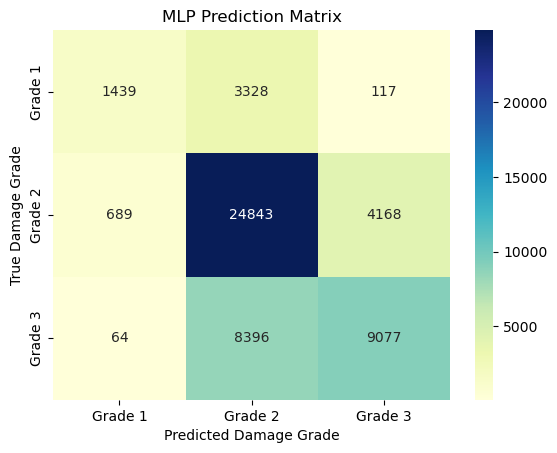

In [46]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
plt.title("MLP Prediction Matrix")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()